# 📊 Global Missing Migrants Dataset 분석

### 📝 개요 (Overview)
이 프로젝트는 **IOM(국제이주기구)**에서 제공하는 **실종된 이민자 데이터(Global Missing Migrants Dataset)**를 분석하여, 주요 통계, 지역별 분포, 위험 요인 등을 파악하는 데 목적이 있습니다.

### 🔍 사용 데이터 (Dataset)
**출처(Source)**: International Organization for Migration (IOM)

**내용**: 전 세계에서 발생한 이민자 실종 및 사망 사건

**주요 피처(Features)**:

Region of Incident: 사건 발생 지역

Reported Year: 발생 연도

Number of Dead: 사망자 수

Cause of Death: 사망 원인

Location Coordinates: 위도/경도

Migration Route: 이주 경로

#### 1. 데이터 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv('Global Missing Migrants Dataset_17,18.csv')

#### 2. 성별 집계

In [ ]:
num_females = df['Number of Females'].sum()
num_males = df['Number of Males'].sum()

print(f"Number of Females: {num_females}")
print(f"Number of Males: {num_males}")

Number of Females: 2522
Number of Males: 3377


#### 3. 전체 이민자 수 추정

In [ ]:
total_immigrants=df['Total Number of Dead and Missing'].sum()+df['Number of Survivors'].sum()
print(f"Total Number of Immigrants: {total_immigrants}")

Total Number of Immigrants: 26518


#### 4. 출신 지역 분석

In [ ]:
region_counts = df['Region of Origin'].value_counts()
print(region_counts)

Region of Origin
Unknown                          776
Latin America / Caribbean (P)    483
Sub-Saharan Africa (P)           383
Eastern Africa (P)               377
Central America                  322
Southern Asia                    194
Western Asia                     106
Western / Southern Asia (P)       72
Northern Africa                   65
Eastern Africa                    41
Western Africa                    40
Sub-Saharan Africa                38
Mixed                             23
Caribbean                         23
South America                     19
Middle Africa                     14
Central Asia                       1
Western / Southern Asia            1
Name: count, dtype: int64


#### 5. 이주 경로별 사고 집계

In [ ]:
migration_route_summary = df.groupby('Migration route')[['Number of Dead', 'Minimum Estimated Number of Missing', 'Number of Survivors']].sum().reset_index()
print(migration_route_summary)

                                      Migration route  Number of Dead  \
0                                 Afghanistan to Iran           128.0   
1                                     Caribbean to US             0.0   
2                               Central Mediterranean          1075.0   
3                                  Comoros to Mayotte             9.0   
4                                       DRC to Uganda             8.0   
5                                              Darien            10.0   
6                   Dominican Republic to Puerto Rico            10.0   
7                               Eastern Mediterranean           151.0   
8                           English Channel to the UK            18.0   
9                         Haiti to Dominican Republic            19.0   
10                   Horn of Africa to Yemen crossing           214.0   
11                                    Iran to Türkiye            34.0   
12                                    Italy to Fran

In [ ]:
cause_of_death_by_route = df.groupby(['Migration route', 'Cause of Death']).size().reset_index(name='Count')
print(cause_of_death_by_route)

          Migration route                                     Cause of Death  \
0     Afghanistan to Iran  Vehicle accident / death linked to hazardous t...   
1     Afghanistan to Iran                                           Violence   
2         Caribbean to US                                           Drowning   
3   Central Mediterranean                                           Drowning   
4   Central Mediterranean                          Drowning,Mixed or unknown   
..                    ...                                                ...   
76  Western Mediterranean  Harsh environmental conditions / lack of adequ...   
77  Western Mediterranean                                   Mixed or unknown   
78  Western Mediterranean   Sickness / lack of access to adequate healthcare   
79  Western Mediterranean  Vehicle accident / death linked to hazardous t...   
80  Western Mediterranean                                           Violence   

    Count  
0      80  
1      16  
2  

####  6. 이주 경로별 사고 지역 분석

In [ ]:
region_of_incident_by_route = df.groupby(['Migration route', 'Region of Incident']).size().reset_index(name='Count')
print(region_of_incident_by_route)

                                      Migration route Region of Incident  \
0                                 Afghanistan to Iran      Southern Asia   
1                                     Caribbean to US          Caribbean   
2                               Central Mediterranean      Mediterranean   
3                                  Comoros to Mayotte     Eastern Africa   
4                                       DRC to Uganda     Eastern Africa   
5                                       DRC to Uganda      Middle Africa   
6                                              Darien    Central America   
7                                              Darien      South America   
8                   Dominican Republic to Puerto Rico          Caribbean   
9                               Eastern Mediterranean      Mediterranean   
10                          English Channel to the UK             Europe   
11                        Haiti to Dominican Republic          Caribbean   
12          

####  7. 사고 지역별 집계

In [ ]:
region_summary = df.groupby('Region of Incident')[['Number of Dead', 'Minimum Estimated Number of Missing', 'Number of Survivors']].sum().reset_index()
print(region_summary)

    Region of Incident  Number of Dead  Minimum Estimated Number of Missing  \
0            Caribbean            54.0                                  155   
1      Central America           294.0                                   12   
2         Central Asia            52.0                                    0   
3       Eastern Africa           335.0                                   48   
4         Eastern Asia             4.0                                    0   
5               Europe           169.0                                    8   
6        Mediterranean          1624.0                                 3852   
7        Middle Africa            90.0                                    1   
8        North America           721.0                                    8   
9      Northern Africa          1685.0                                   21   
10       South America            27.0                                    3   
11  South-eastern Asia           277.0              

####  8. 지역별 사망 원인 분석

In [ ]:
cause_of_death_by_region = df.groupby(['Region of Incident', 'Cause of Death']).size().reset_index(name='Count')
print(cause_of_death_by_region)

   Region of Incident                                     Cause of Death  \
0           Caribbean                                           Drowning   
1           Caribbean                                   Mixed or unknown   
2           Caribbean  Vehicle accident / death linked to hazardous t...   
3           Caribbean                                           Violence   
4     Central America                                   Accidental death   
..                ...                                                ...   
82       Western Asia  Harsh environmental conditions / lack of adequ...   
83       Western Asia                                   Mixed or unknown   
84       Western Asia   Sickness / lack of access to adequate healthcare   
85       Western Asia  Vehicle accident / death linked to hazardous t...   
86       Western Asia                                           Violence   

    Count  
0      17  
1       2  
2       1  
3       1  
4       1  
..    ...  
82 

#### 9. 출신 지역별 피해 집계

In [ ]:
region_origin_summary = df.groupby('Region of Origin')[['Number of Dead', 'Minimum Estimated Number of Missing', 'Number of Survivors']].sum().reset_index()
print(region_origin_summary)

                 Region of Origin  Number of Dead  \
0                       Caribbean            55.0   
1                 Central America           367.0   
2                    Central Asia            52.0   
3                  Eastern Africa           284.0   
4              Eastern Africa (P)           834.0   
5   Latin America / Caribbean (P)           620.0   
6                   Middle Africa            89.0   
7                           Mixed           196.0   
8                 Northern Africa           182.0   
9                   South America            37.0   
10                  Southern Asia           483.0   
11             Sub-Saharan Africa            78.0   
12         Sub-Saharan Africa (P)           793.0   
13                        Unknown          2240.0   
14        Western / Southern Asia            17.0   
15    Western / Southern Asia (P)           216.0   
16                 Western Africa           141.0   
17                   Western Asia           24

#### 10. 출신 지역별 성별 분포

In [ ]:
gender_counts_by_region = df.groupby('Region of Origin')[['Number of Females', 'Number of Males']].sum().reset_index()
print(gender_counts_by_region)

                 Region of Origin  Number of Females  Number of Males
0                       Caribbean                 63               33
1                 Central America                 57              300
2                    Central Asia                  0                0
3                  Eastern Africa                 58              167
4              Eastern Africa (P)                132              290
5   Latin America / Caribbean (P)                 34              367
6                   Middle Africa                 10                5
7                           Mixed                167              101
8                 Northern Africa                186               96
9                   South America                 10               21
10                  Southern Asia                148              236
11             Sub-Saharan Africa                 37              139
12         Sub-Saharan Africa (P)                545              542
13                  

####  11. 국가별 이민자 수

In [ ]:
country_by_region = df.groupby(['Region of Origin', 'Country of Origin']).size().reset_index(name='Count')
print(country_by_region)

    Region of Origin     Country of Origin  Count
0          Caribbean               Bahamas      1
1          Caribbean                  Cuba      4
2          Caribbean    Dominican Republic      9
3          Caribbean                 Haiti      8
4          Caribbean               Unknown      1
..               ...                   ...    ...
117   Western Africa          Sierra Leone      1
118     Western Asia                  Iraq     16
119     Western Asia    State of Palestine      1
120     Western Asia  Syrian Arab Republic     85
121     Western Asia               Türkiye      4

[122 rows x 3 columns]


In [ ]:
cause_of_death_summary = df.groupby('Cause of Death')['Number of Dead'].sum().reset_index()
print(cause_of_death_summary)

                                      Cause of Death  Number of Dead
0                                   Accidental death            21.0
1                                           Drowning          2170.0
2                          Drowning,Mixed or unknown             6.0
3  Drowning,Vehicle accident / death linked to ha...             3.0
4  Harsh environmental conditions / lack of adequ...           768.0
5                                   Mixed or unknown          1802.0
6   Sickness / lack of access to adequate healthcare           359.0
7  Vehicle accident / death linked to hazardous t...          1141.0
8                                           Violence           659.0


전체 데이터셋

In [ ]:
import pandas as pd
df = pd.read_csv('Global Missing Migrants Dataset.csv')

In [ ]:
df['Migration route'].fillna('Unknown', inplace=True)

In [ ]:
region_of_incident_by_route = df.groupby(['Migration route', 'Region of Incident']).size().reset_index(name='Count')
print(region_of_incident_by_route)

                                      Migration route  Region of Incident  \
0                                 Afghanistan to Iran       Southern Asia   
1                                   Belarus-EU border              Europe   
2                        Caribbean to Central America           Caribbean   
3                                     Caribbean to US           Caribbean   
4                                     Caribbean to US       North America   
5                               Central Mediterranean       Mediterranean   
6        Central Mediterranean,Sahara Desert crossing     Northern Africa   
7                                  Comoros to Mayotte      Eastern Africa   
8                                  Comoros to Mayotte     Southern Africa   
9                                       DRC to Uganda      Eastern Africa   
10                                      DRC to Uganda       Middle Africa   
11                                             Darien     Central America   

In [ ]:
cause_of_death_by_route = df.groupby(['Migration route', 'Cause of Death']).size().reset_index(name='Count')
afghanistan_to_iran_route = cause_of_death_by_route[cause_of_death_by_route['Migration route'] == 'Afghanistan to Iran']
print(afghanistan_to_iran_route)

       Migration route                                     Cause of Death  \
0  Afghanistan to Iran                                   Accidental death   
1  Afghanistan to Iran                                           Drowning   
2  Afghanistan to Iran  Harsh environmental conditions / lack of adequ...   
3  Afghanistan to Iran                                   Mixed or unknown   
4  Afghanistan to Iran   Sickness / lack of access to adequate healthcare   
5  Afghanistan to Iran  Vehicle accident / death linked to hazardous t...   
6  Afghanistan to Iran                                           Violence   

   Count  
0    311  
1      6  
2     21  
3     26  
4    171  
5    468  
6     96  


In [ ]:
Western_Mediterranean_to_iran_route = cause_of_death_by_route[cause_of_death_by_route['Migration route'] == 'Western Mediterranean']
print(Western_Mediterranean_to_iran_route)

           Migration route                                     Cause of Death  \
140  Western Mediterranean                                   Accidental death   
141  Western Mediterranean                                           Drowning   
142  Western Mediterranean  Drowning,Harsh environmental conditions / lack...   
143  Western Mediterranean  Drowning,Vehicle accident / death linked to ha...   
144  Western Mediterranean  Harsh environmental conditions / lack of adequ...   
145  Western Mediterranean                                   Mixed or unknown   
146  Western Mediterranean   Sickness / lack of access to adequate healthcare   
147  Western Mediterranean  Vehicle accident / death linked to hazardous t...   
148  Western Mediterranean                                           Violence   

     Count  
140      5  
141    529  
142      1  
143      1  
144     19  
145     39  
146      5  
147      9  
148      6  


In [ ]:
cause_of_death_by_region = df.groupby(['Region of Incident', 'Cause of Death']).size().reset_index(name='Count')
max_cause_of_death_by_region = cause_of_death_by_region.loc[cause_of_death_by_region.groupby('Region of Incident')['Count'].idxmax()]
print(max_cause_of_death_by_region)

     Region of Incident                                     Cause of Death  \
1             Caribbean                                           Drowning   
7       Central America                                           Drowning   
15         Central Asia  Vehicle accident / death linked to hazardous t...   
19       Eastern Africa                                   Mixed or unknown   
24         Eastern Asia                                           Drowning   
33               Europe  Vehicle accident / death linked to hazardous t...   
36        Mediterranean                                           Drowning   
50        Middle Africa  Vehicle accident / death linked to hazardous t...   
55        North America                                   Mixed or unknown   
66      Northern Africa                                   Mixed or unknown   
77        South America                                           Violence   
81   South-eastern Asia                                   Mixed 

In [ ]:
cause_of_death_summary = df.groupby('Cause of Death')['Number of Dead'].sum().reset_index()
print(cause_of_death_summary)

                                       Cause of Death  Number of Dead
0                                    Accidental death           697.0
1                                            Drowning         12578.0
2   Drowning,Harsh environmental conditions / lack...           108.0
3                           Drowning,Mixed or unknown            50.0
4   Drowning,Sickness / lack of access to adequate...             4.0
5   Drowning,Vehicle accident / death linked to ha...             3.0
6                                   Drowning,Violence             3.0
7   Harsh environmental conditions / lack of adequ...          2827.0
8   Harsh environmental conditions / lack of adequ...             8.0
9   Harsh environmental conditions / lack of adequ...            14.0
10                                   Mixed or unknown          6561.0
11  Mixed or unknown,Vehicle accident / death link...             7.0
12   Sickness / lack of access to adequate healthcare          1525.0
13  Vehicle accident

<ipython-input-9-0327c5b92384>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


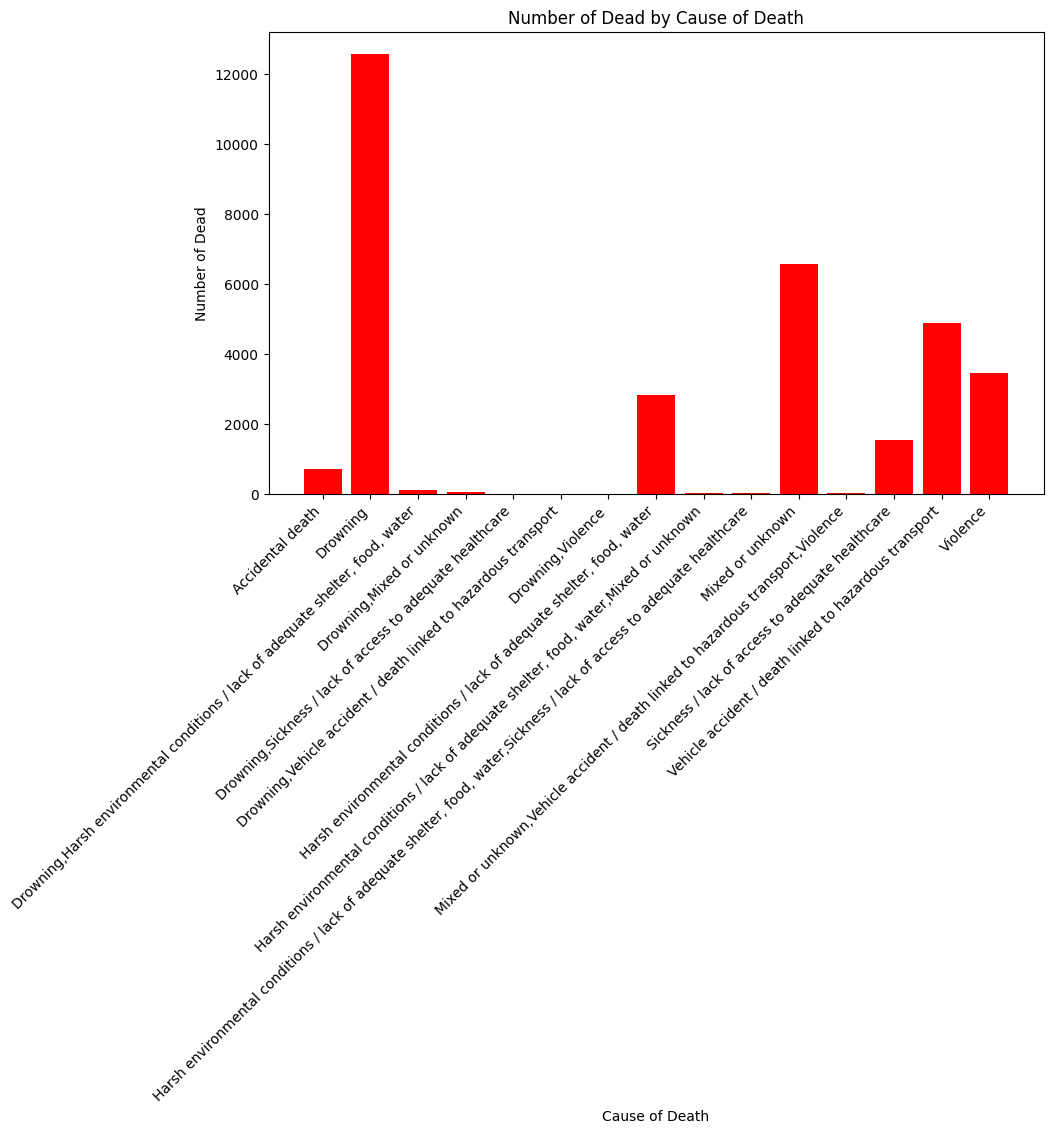

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Cause of Death'별 'Number of Dead' 합계 계산
cause_of_death_summary = df.groupby('Cause of Death')['Number of Dead'].sum().reset_index()

# 막대그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(cause_of_death_summary['Cause of Death'], cause_of_death_summary['Number of Dead'], color='red')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Dead')
plt.title('Number of Dead by Cause of Death')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 그래프 보여주기
plt.show()